In [1]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")

data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical 
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [4]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

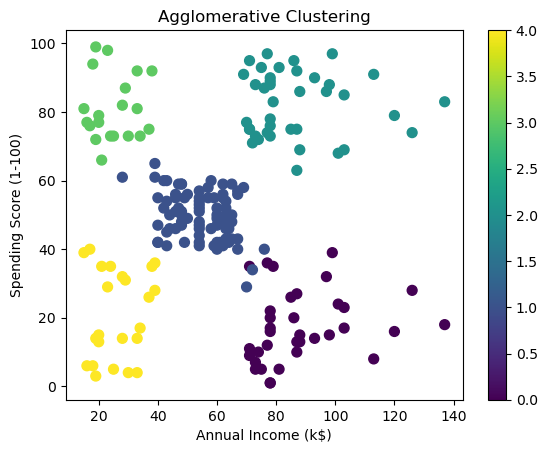

In [6]:
# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111)

# Use clust_labels for coloring the clusters in the scatter plot
scatter = ax.scatter(data['Annual Income (k$)'], data["Spending Score (1-100)"], c=clust_labels, s=50)

# Set the plot title and labels
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")

# Add a colorbar to indicate cluster assignment
plt.colorbar(scatter)


#### Agglomerative Cluster Interpretation
Customers in green: They have a small annual income but they tend to spend a lot. We can call them the extravagants.

Customers in yellow: Customers with low income and they don’t spend a lot. We can call them the careful ones.

Customers in blue: Customers with average income and average spending They are normal customers.

Customers in light blue: Customers with high annual income and high spending score. They are generous customers.

Customers in purple: Customers with high annual income but they don’t spend a lot. We can call them the cheap ones.

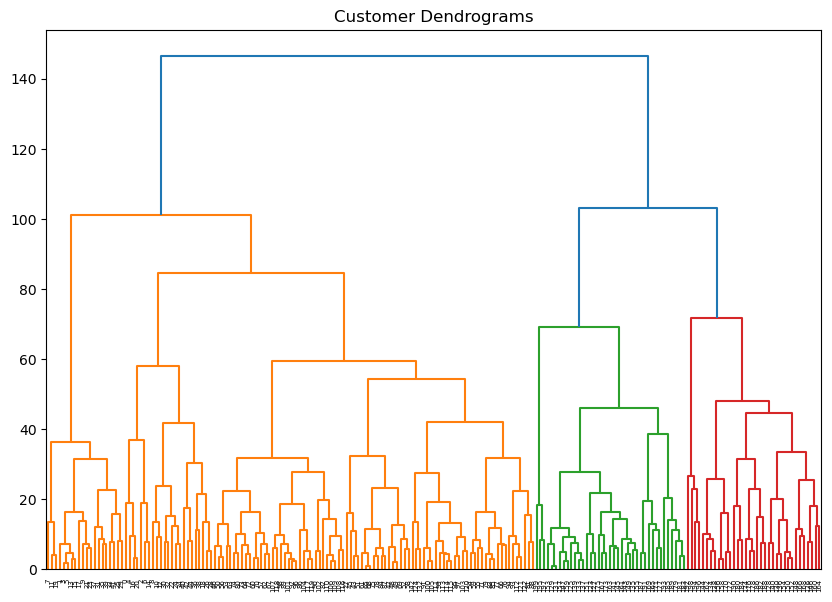

In [7]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))